<a href="https://colab.research.google.com/github/aryantyagi0/team-efficiency-prediction/blob/main/Mfg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from xgboost import XGBRegressor


In [56]:
df=pd.read_csv('/content/manufacturing_data.csv')
print(df.shape)
df.head()

(1197, 15)


,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [57]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           1197 non-null   object 
 1   fiscalQuarter        1197 non-null   object 
 2   productionDept       1197 non-null   object 
 3   dayOfWeek            1197 non-null   object 
 4   team                 1197 non-null   object 
 5   plannedEfficiency    1197 non-null   float64
 6   standardMinuteValue  1197 non-null   float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      1197 non-null   int64  
 9   performanceBonus     1197 non-null   int64  
 10  idleMinutes          1197 non-null   float64
 11  idleWorkers          1197 non-null   int64  
 12  styleChangeCount     1197 non-null   object 
 13  workerCount          1197 non-null   float64
 14  efficiencyScore      1197 non-null   float64
dtypes: float64(6), int64(3), object(6)
mem

In [58]:
df.shape

(1197, 15)

In [59]:

df['recordDate'] = pd.to_datetime(df['recordDate'], errors='coerce')
print(df.isna().sum())
df['month'] = df['recordDate'].dt.month
df['day'] = df['recordDate'].dt.day
df['is_weekend'] = df['dayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
print(df.head())
df = df[df['workInProgress'].notnull()]


recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64
  recordDate fiscalQuarter         productionDept dayOfWeek     team  \
0 2015-02-24            Q4         Stitching Unit   Tuesday  Line-S1   
1 2015-01-19            Q3         Stitching Unit    Monday  Line-F3   
2 2015-01-06            Q1   Finishing & Quality    Tuesday  Line-C2   
3 2015-02-24            Q4    Finishing & Quality   Tuesday  Line-S2   
4 2015-01-04            Q1   Finishing & Quality     Sunday  Line-C1   

   plannedEfficiency  standardMinuteValue  workInProgress  overtimeMinutes  \
0                0.6                22.53           708.0             5

In [61]:
df.isna().sum()

,0
recordDate,0
fiscalQuarter,0
productionDept,0
dayOfWeek,0
team,0
plannedEfficiency,0
standardMinuteValue,0
workInProgress,0
overtimeMinutes,0
performanceBonus,0


# EDA

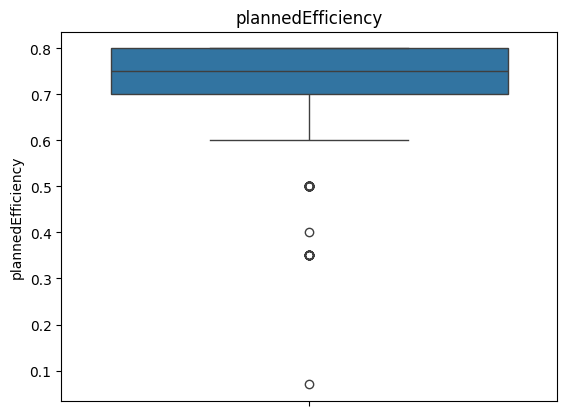

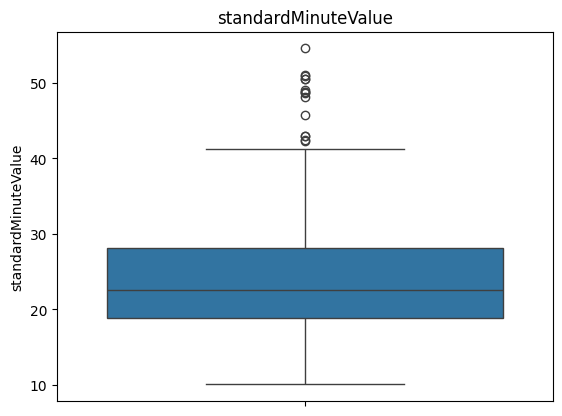

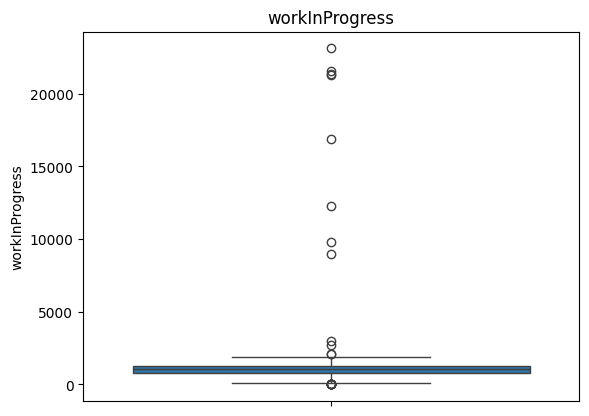

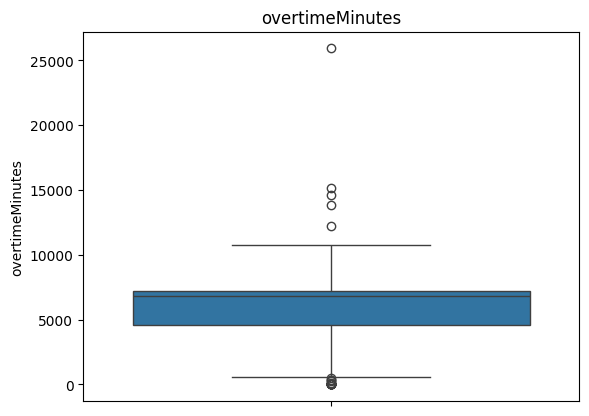

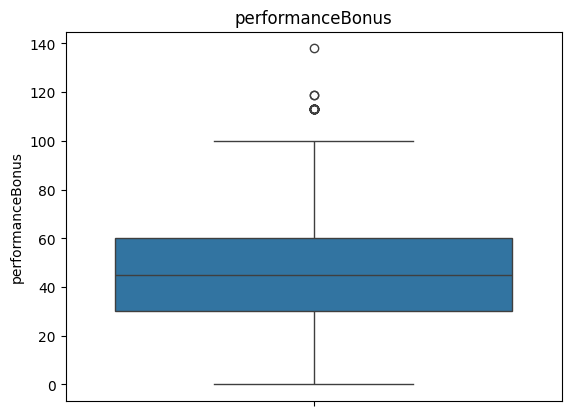

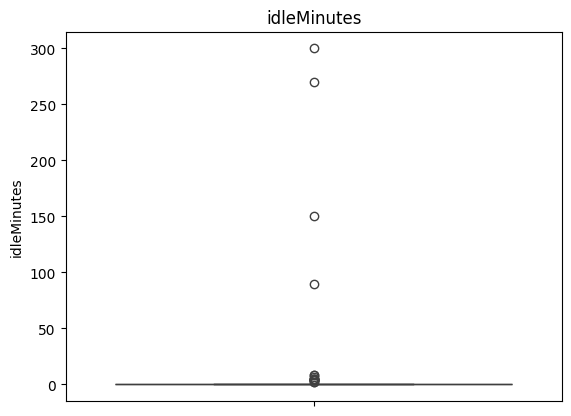

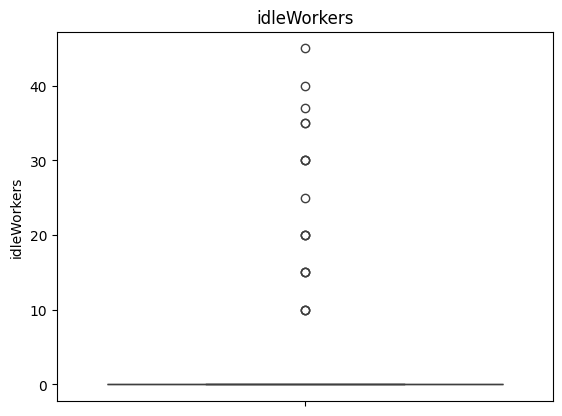

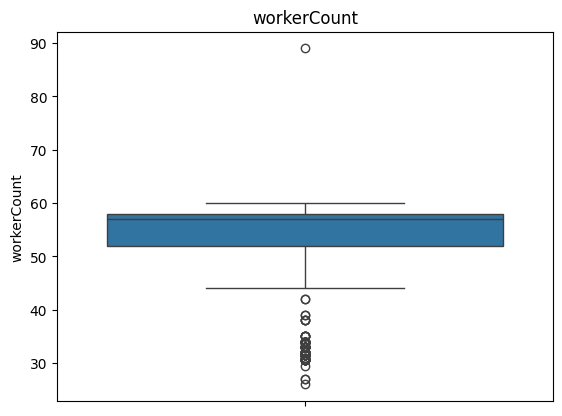

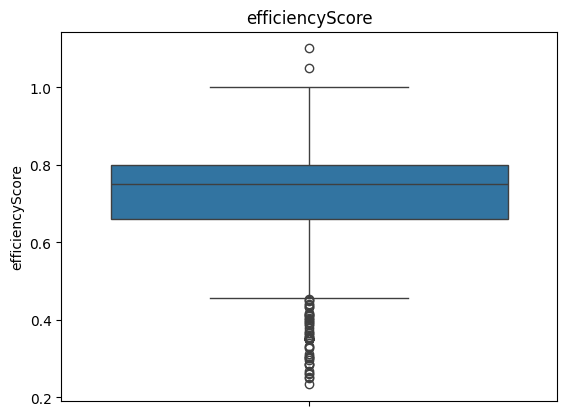

In [62]:
num_cols = ['plannedEfficiency', 'standardMinuteValue', 'workInProgress',
            'overtimeMinutes', 'performanceBonus', 'idleMinutes',
            'idleWorkers', 'workerCount', 'efficiencyScore']
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

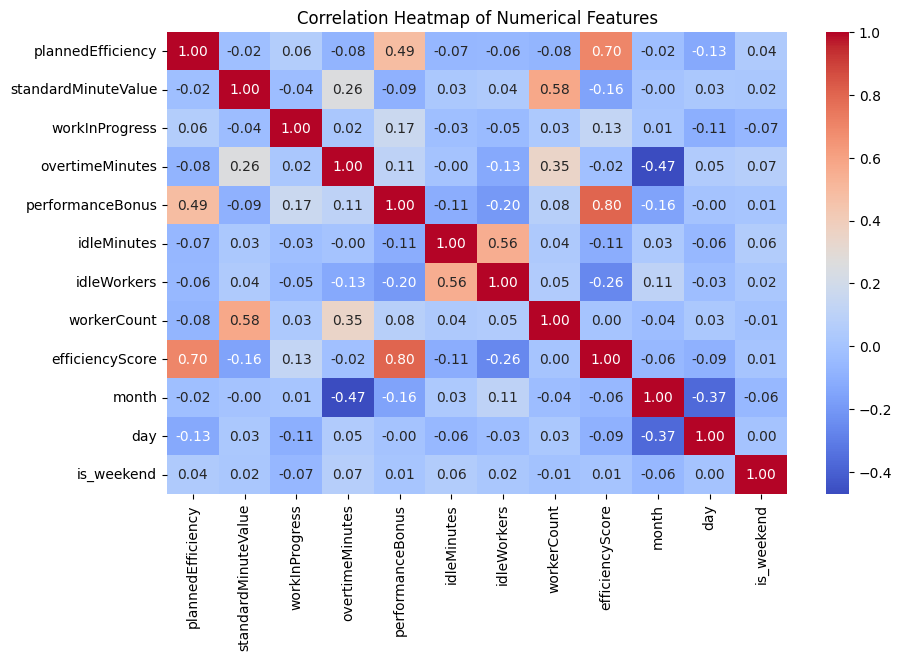

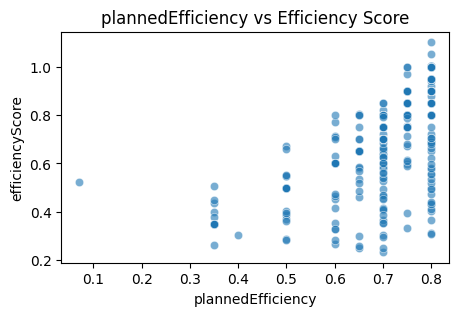

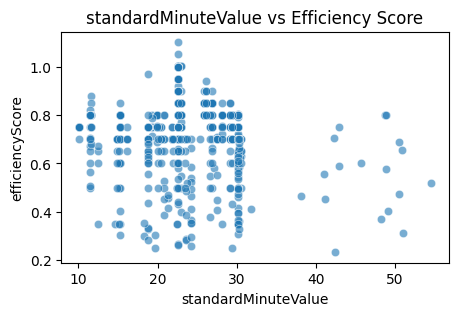

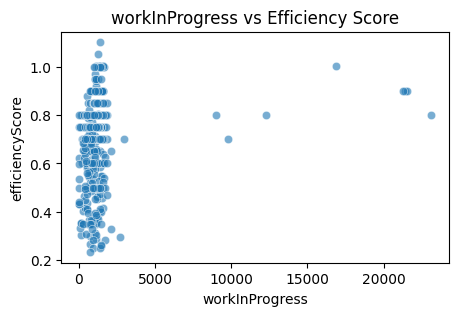

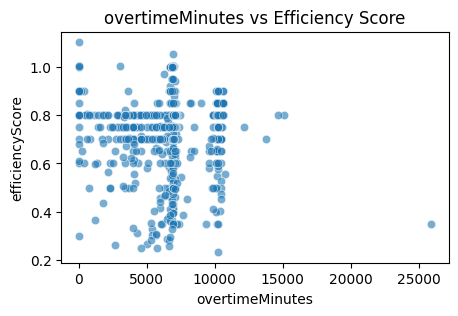

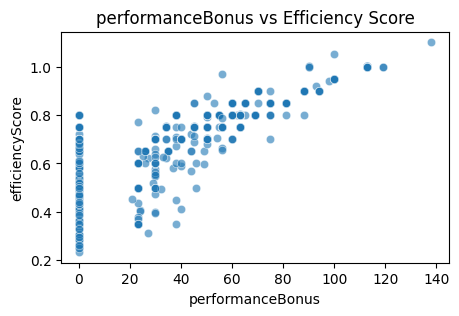

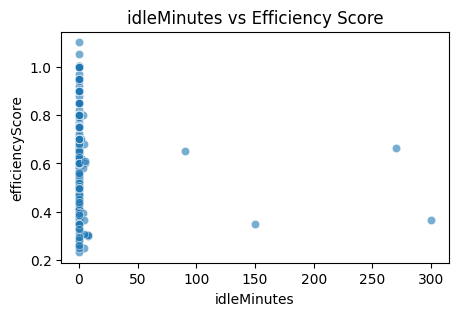

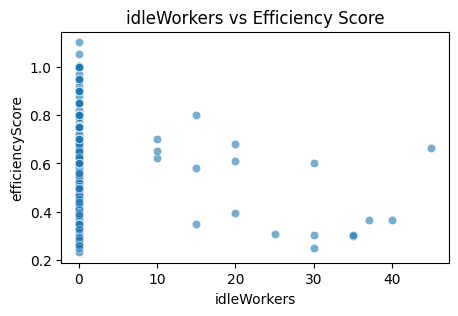

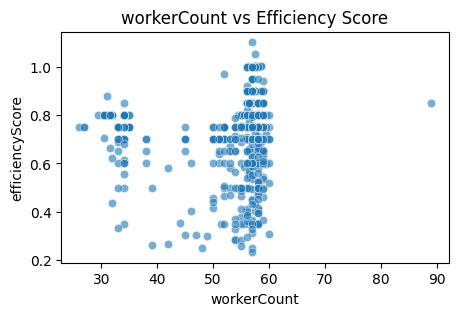

In [63]:
#  Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#  Scatter plots vs efficiency
cols = ['plannedEfficiency', 'standardMinuteValue', 'workInProgress',
        'overtimeMinutes', 'performanceBonus', 'idleMinutes',
        'idleWorkers', 'workerCount']
for c in cols:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=c, y='efficiencyScore', data=df, alpha=0.6)
    plt.title(f'{c} vs Efficiency Score')
    plt.show()


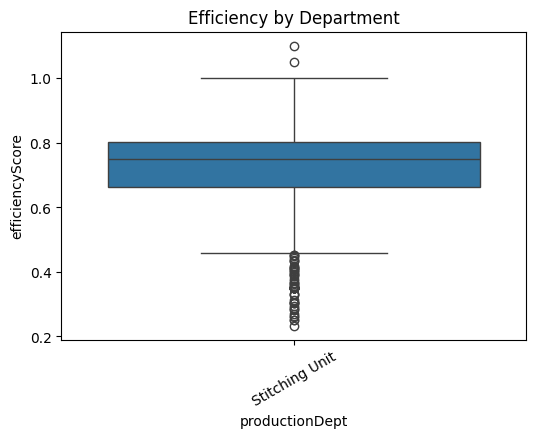

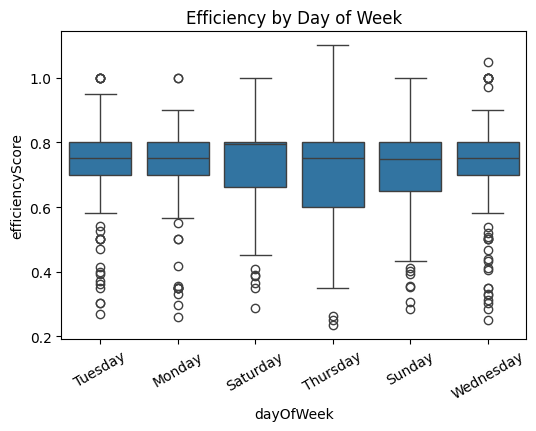

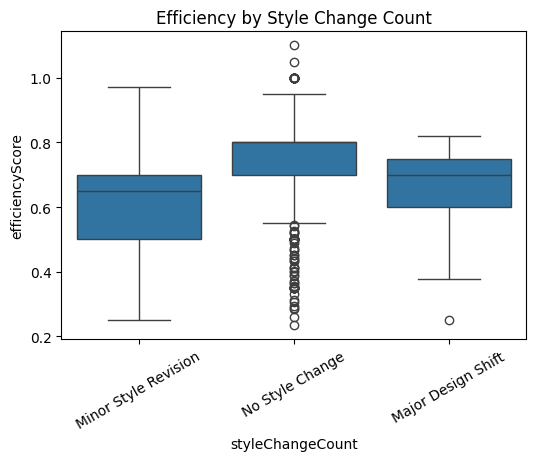

In [64]:
# 3️⃣ Boxplots for categorical variables
plt.figure(figsize=(6,4))
sns.boxplot(x='productionDept', y='efficiencyScore', data=df)
plt.title('Efficiency by Department')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='dayOfWeek', y='efficiencyScore', data=df)
plt.title('Efficiency by Day of Week')
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='styleChangeCount', y='efficiencyScore', data=df)
plt.title('Efficiency by Style Change Count')
plt.xticks(rotation=30)
plt.show()


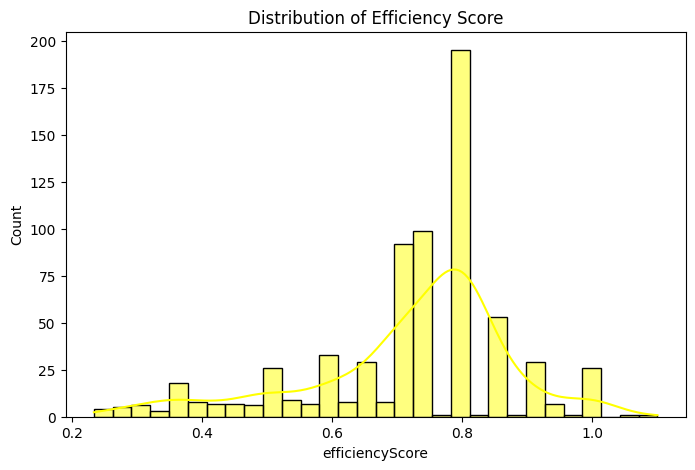

In [65]:
# distribution
plt.figure(figsize=(8,5))
sns.histplot(df['efficiencyScore'], bins=30, kde=True, color='yellow')
plt.title('Distribution of Efficiency Score')
plt.show()

In [66]:
df = df.drop(['recordDate'], axis=1)


In [67]:
df.head()

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore,month,day,is_weekend
0,Q4,Stitching Unit,Tuesday,Line-S1,0.60,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214,2,24,0
1,Q3,Stitching Unit,Monday,Line-F3,0.80,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359,1,19,0
5,Q3,Stitching Unit,Monday,Line-F2,0.80,30.10,461.0,0,0,0.0,0,No Style Change,59.0,0.800980,2,16,0
8,Q4,Stitching Unit,Saturday,Line-C1,0.65,22.52,1295.0,10170,26,0.0,0,No Style Change,56.5,0.650417,1,24,1
9,Q1,Stitching Unit,Thursday,Line-Q1,0.75,18.79,1228.0,6240,45,0.0,0,No Style Change,52.0,0.750396,3,5,0


In [68]:
df.shape

(691, 17)

# Encoding

In [69]:
# from sklearn.preprocessing import OneHotEncoder

# cat_cols = ['productionDept', 'styleChangeCount', 'fiscalQuarter', 'dayOfWeek', 'team']

# # Use sparse_output=False instead of sparse=False
# ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

# # Fit and transform
# encoded_array = ohe.fit_transform(df[cat_cols])

# # Convert to DataFrame
# encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(cat_cols))

# # Align index with original df
# encoded_df.index = df.index

# # Keep numeric features
# numeric_cols = ['plannedEfficiency', 'standardMinuteValue', 'workInProgress',
#                 'overtimeMinutes', 'performanceBonus', 'idleMinutes',
#                 'idleWorkers', 'workerCount', 'month', 'day', 'is_weekend']

# # Final dataset
# final_df = pd.concat([df[numeric_cols], encoded_df, df['efficiencyScore']], axis=1)

# print(final_df.head())
# print(final_df.shape)
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()
cat_cols = ['productionDept', 'styleChangeCount', 'fiscalQuarter', 'dayOfWeek', 'team']

for col in cat_cols:
    le = LabelEncoder()
    df_le[col] = le.fit_transform(df_le[col])

df_le.head()



,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore,month,day,is_weekend
0,3,0,4,9,0.60,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214,2,24,0
1,2,0,0,4,0.80,11.41,1028.0,4380,50,0.0,0,2,31.0,0.800359,1,19,0
5,2,0,0,3,0.80,30.10,461.0,0,0,0.0,0,2,59.0,0.800980,2,16,0
8,3,0,1,0,0.65,22.52,1295.0,10170,26,0.0,0,2,56.5,0.650417,1,24,1
9,0,0,3,7,0.75,18.79,1228.0,6240,45,0.0,0,2,52.0,0.750396,3,5,0


In [70]:

x=df_le.drop('efficiencyScore',axis=1)
y=df_le['efficiencyScore']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(552, 16)
(139, 16)
(552,)
(139,)


In [73]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

# Linear Regression

In [91]:
lr_model_std = LinearRegression()
# Train the model
lr_model.fit(X_train_scaled, y_train)
# Predict on training and test data
y_train_pred_scaled = lr_model.predict(X_train_scaled)
y_test_pred_scaled = lr_model.predict(X_test_scaled)

# Testing performance
test_mse = mean_squared_error(y_test, y_test_pred_scaled)
test_r2 = r2_score(y_test, y_test_pred_scaled)
print("Linear Regression with standardization on Training data")
print("R² Score:", r2_score(y_train, y_train_pred_scaled))
print("MAE:", mean_absolute_error(y_train, y_train_pred_scaled))
print("MSE:", mean_squared_error(y_train, y_train_pred_scaled))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_scaled)))
print("Linear Regression with standardization on Testing data")
print("R² Score:", r2_score(y_test, y_test_pred_scaled))
print("MAE:", mean_absolute_error(y_test, y_test_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_test_pred_scaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_scaled)))


Linear Regression with standardization on Training data
R² Score: 0.8153839555559994
MAE: 0.04337712356247032
MSE: 0.004698452266692431
RMSE: 0.06854525706927089
Linear Regression with standardization on Testing data
R² Score: 0.7062379679647663
MAE: 0.04675615494840913
MSE: 0.005201265371193117
RMSE: 0.07211979874620503


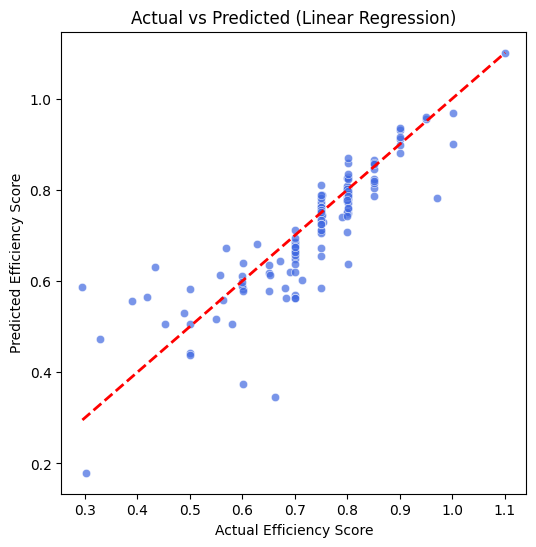

In [93]:


plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_test_pred_scaled, alpha=0.7, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Efficiency Score")
plt.ylabel("Predicted Efficiency Score")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_train=rf_model.predict(X_train)
y_pred_rf = rf_model.predict(X_test)

/tmp/ipython-input-2198836209.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette='viridis')


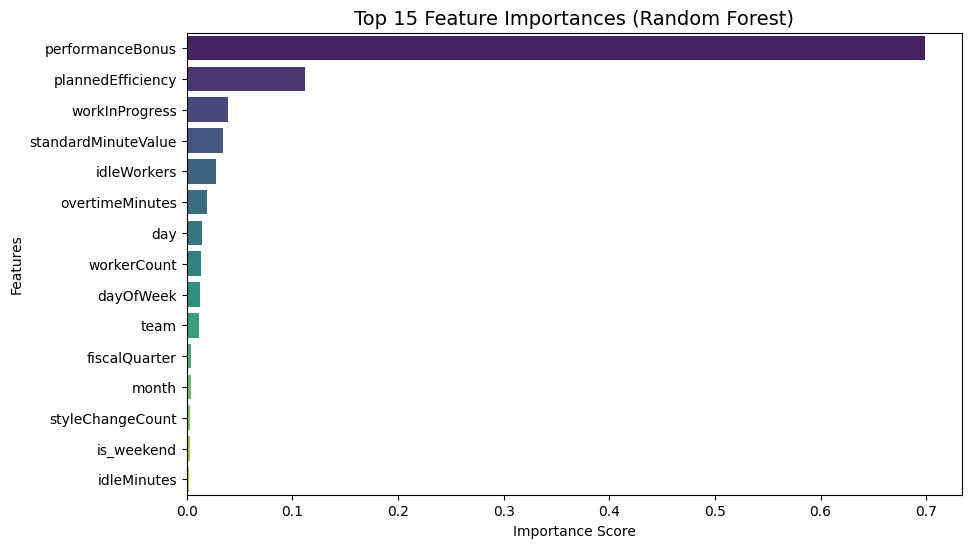

In [94]:

importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.head(15), y=feat_imp.head(15).index, palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [85]:
print(" Evaluation of Random Forest on training data :")
print("R² Score:", r2_score(y_train, y_pred_rf_train))
print("MAE:", mean_absolute_error(y_train, y_pred_rf_train))
print("MSE:", mean_squared_error(y_train, y_pred_rf_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_rf_train)))

print(" Evaluation of Random Forest on testing data :")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


 Evaluation of Random Forest on training data :
R² Score: 0.9775984387514
MAE: 0.012521373817065265
MSE: 0.000570116571086324
RMSE: 0.023877113960575805
 Evaluation of Random Forest on testing data :
R² Score: 0.7728319494007936
MAE: 0.03619065191964028
MSE: 0.004022171642935062
RMSE: 0.06342059320863423


# XGB

In [86]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.04,
    subsample=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [88]:
y_train_pred_xgb = xgb_model.predict(X_train)
print(" XGB Evaluation on training data :")
print("R² Score:", r2_score(y_train, y_train_pred_xgb))
print("MAE:", mean_absolute_error(y_train, y_train_pred_xgb))
print("MSE:", mean_squared_error(y_train, y_train_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)))
print(" XGB on test data:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


 XGB Evaluation on training data :
R² Score: 0.9939325541220264
MAE: 0.008282574461306308
MSE: 0.0001544156409820929
RMSE: 0.01242640901395463
 XGB on test data:
R² Score: 0.7636849480368556
MAE: 0.036042930094371976
MSE: 0.004184125797169672
RMSE: 0.06468481890806893


# Random Forest Hyperparametertuning

In [52]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("\nBest Model Performance:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_best)))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
395 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Model Performance:
R² Score: 0.7733694690656079
MAE: 0.03898088063109067
MSE: 0.004012654475588538
RMSE: 0.06334551661789915


In [96]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)
best_xgb = rand_search.best_estimator_

y_pred = best_xgb.predict(X_test)
y_pred_train=best_xgb.predict(X_train)
print("XGBoost Best Model Performance on training:")
print("R² Score:", r2_score(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("XGBoost Best Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
XGBoost Best Model Performance on training:
R² Score: 0.9998774263081551
MAE: 0.0011492008258461336
MSE: 3.1194831522894805e-06
RMSE: 0.0017662058635078417
XGBoost Best Model Performance:
R² Score: 0.749490737079879
MAE: 0.03850617554088741
MSE: 0.004435444381162437
RMSE: 0.06659913198505245
